In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_lvq import GlvqModel 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data = pandas.read_json("../json/tagged_remote_sensing_2017.json", orient="records")
data["type"] = encoder.fit_transform(data["type"])

In [2]:
# This block code was forked from https://github.com/MrNuggelz/sklearn-lvq/blob/stable/sklearn_lvq/utils.py and 
# updated for our needs

from operator import itemgetter

import matplotlib.pyplot as plt
from sklearn.utils import validation


def plot2d(model, x, y, figure):
    """
    Projects the input data to two dimensions and plots it. The projection is
    done using the relevances of the given glvq model.
    """
    f = plt.figure(figure)
    ax = f.add_subplot(111)
    
    x, y = validation.check_X_y(x, y)
    dim = 2
    
    pred = model.predict(x)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    ax.scatter(x[:, 0], x[:, 1], c=_to_tango_colors(y), alpha=0.5)
    ax.scatter(x[:, 0], x[:, 1], c=_to_tango_colors(pred), marker='.')
    ax.scatter(model.w_[:, 0], model.w_[:, 1], c=_tango_color('aluminium', 5), marker='D')
    ax.scatter(model.w_[:, 0], model.w_[:, 1], c=_to_tango_colors(model.c_w_, 0), marker='.')
    ax.axis('equal')
    
    x_p = model.project(x, dim, print_variance_covered=True)
    w_p = model.project(model.w_, dim)
    
    return f


colors = {
    "skyblue": ['#729fcf', '#3465a4', '#204a87'],
    "scarletred": ['#ef2929', '#cc0000', '#a40000'],
    "orange": ['#fcaf3e', '#f57900', '#ce5c00'],
    "plum": ['#ad7fa8', '#75507b', '#5c3566'],
    "chameleon": ['#8ae234', '#73d216', '#4e9a06'],
    "butter": ['#fce94f', 'edd400', '#c4a000'],
    "chocolate": ['#e9b96e', '#c17d11', '#8f5902'],
    "aluminium": ['#eeeeec', '#d3d7cf', '#babdb6', '#888a85', '#555753',
                  '#2e3436']
}

color_names = list(colors.keys())


def _tango_color(name, brightness=0):
    if type(name) is int:
        if name >= len(color_names):
            name = name % len(color_names)
        name = color_names[name]
    if name in colors:
        return colors[name][brightness]
    else:
        raise ValueError('{} is not a valid color'.format(name))


def _to_tango_colors(elems, brightness=0):
    elem_set = list(set(elems))
    return [_tango_color(elem_set.index(e), brightness) for e in elems]

not implemented!
not implemented!
not implemented!
not implemented!


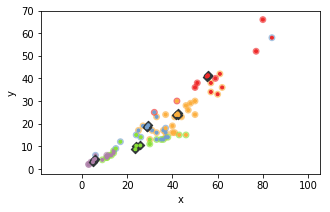

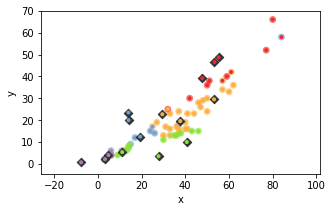

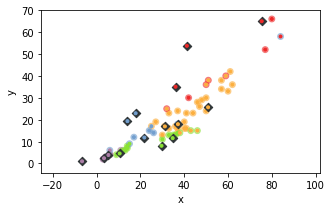

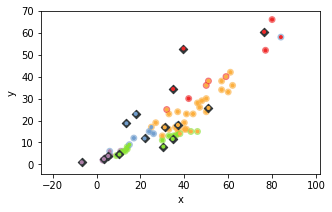

In [6]:
for iters in [1, 10, 50, 100]:
    model = GlvqModel(prototypes_per_class=3, max_iter=iters, random_state=1)
    model.fit(data[["shortwave_infrared_1", "shortwave_infrared_2"]], data["type"])
    fig = plt.figure(figsize=(5, 3))
    figure = plot2d(model, data[["shortwave_infrared_1", "shortwave_infrared_2"]], data["type"], fig.number)
    figure.savefig(f"pdf/lvq_figure_{iters}.pdf", 
                  dpi=600,
                  format="pdf", 
                  facecolor="none", 
                  alpha=0, 
                  edgecolor="none", 
                  bbox_inches="tight",
                  orientation="portrait")